**Instruções**

- A planilha para fazer o exercício está dentro de arquivo compactado está no site do IBGE: Estatísticas > Econômicas > Contas Nacionais > Produto Interno Bruto dos Municípios

- Todos os dados necessários estão na planilha "PIB dos Municípios - base de dados 2010-2017.xls"

- O conteúdo da lista está nos notebooks 14, 15 e 16. Procurar no stackoverflow/documentação/google é essencial também. O conhecimento medido aqui também envolve saber procurar as dúvidas na internet. Até a entrega ainda haverá outra aula de Pandas. De qualquer forma, sugiro fortemente já começar a fazer agora, assim como já consultar o notebook que ainda não foi dado: "16_Pandas_EDA".

- Pode-se usar qualquer pacote de visualização nos exercícios de gráficos (matplotlib, seaborn, pandas.plot, etc.). É necessário que os gráficos sejam informativos, logo título dos eixos são obrigatórios (algum tipo de variação nas cores e senso estético são bem-vindos também).

- Pode-se usar qualquer pacote em qualquer questão. Em caso de dúvidas sobre o enunciado das questões, me enviem um email.

- A entrega é para o dia 05/10/2020

# Questões

In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Monitoria 5'

Mounted at /content/gdrive


Definindo o tamanho de todas as figuras desse notebook

In [35]:
plt.rcParams["figure.figsize"] = (10,7)

In [2]:
os.chdir(root_path)

In [3]:
df = pd.read_excel(os.listdir()[1])

In [4]:
df.columns

Index(['Ano', 'Código da Grande Região', 'Nome da Grande Região',
       'Código da Unidade da Federação', 'Sigla da Unidade da Federação',
       'Nome da Unidade da Federação', 'Código do Município',
       'Nome do Município', 'Região Metropolitana', 'Código da Mesorregião',
       'Nome da Mesorregião', 'Código da Microrregião', 'Nome da Microrregião',
       'Código da Região Geográfica Imediata',
       'Nome da Região Geográfica Imediata',
       'Município da Região Geográfica Imediata',
       'Código da Região Geográfica Intermediária',
       'Nome da Região Geográfica Intermediária',
       'Município da Região Geográfica Intermediária',
       'Código Concentração Urbana', 'Nome Concentração Urbana',
       'Tipo Concentração Urbana', 'Código Arranjo Populacional',
       'Nome Arranjo Populacional', 'Hierarquia Urbana',
       'Hierarquia Urbana (principais categorias)', 'Código da Região Rural',
       'Nome da Região Rural',
       'Região rural (segundo classificação d

In [5]:
df.rename(columns = {'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)':'PIB',
                     'Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)':'Impostos',
                     'Nome do Município':'Nome', 'Sigla da Unidade da Federação':'UF',
                     'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'PIB_per_capita',
                     'Atividade com maior valor adicionado bruto':'ativ1',
                     'Nome da Grande Região':'Grande Região'}, inplace = True)

### 1) Crie uma coluna no DataFrame gerado pela leitura do csv com a proporção Impostos/PIB. 

In [6]:
df['carga_trib'] = df['Impostos']/df['PIB']

### 2) Use um método de pd.Series que crie uma série com a quantidade de municípios por UF. [Considere apenas o ano de 2017].

In [7]:
df[df.Ano == 2017].UF.value_counts()

MG    853
SP    645
RS    497
BA    417
PR    399
SC    295
GO    246
PI    224
PB    223
MA    217
PE    185
CE    184
RN    167
PA    144
MT    141
TO    139
AL    102
RJ     92
MS     79
ES     78
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
Name: UF, dtype: int64

### 3) Existe alguma relação entre PIB per capita e atividade com maior valor adicionado bruto? Faça uma média de PIB per capita por atividade com maior valor adicionado bruto. [Considere todos os anos]

In [8]:
df.groupby('ativ1')['PIB_per_capita'].mean().sort_values(ascending = False)

ativ1
Indústrias extrativas                                                                   59406.835633
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação    52083.287533
Comércio e reparação de veículos automotores e motocicletas                             44116.076822
Indústrias de transformação                                                             38614.117626
Agricultura, inclusive apoio à agricultura e a pós colheita                             25477.872595
Construção                                                                              25213.240183
Produção florestal, pesca e aquicultura                                                 23190.935992
Demais serviços                                                                         22121.604018
Pecuária, inclusive apoio à pecuária                                                    19808.056472
Administração, defesa, educação e saúde públicas e seguridade social                 

### 4) Faça um gráfico de barras com a resposta da questão 3.

In [9]:
dict_atividade = {'Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação':'Utilidade Pública',
                  'Comércio e reparação de veículos automotores e motocicletas':'Automóveis',
                  'Agricultura, inclusive apoio à agricultura e a pós colheita':'Agro',
                  'Produção florestal, pesca e aquicultura':'Prod. Florestal',
                  'Administração, defesa, educação e saúde públicas e seguridade social':'Adm Pública',
                  'Pecuária, inclusive apoio à pecuária':'Pecuária',
                  'Indústrias de transformação':'Indústria'}

In [10]:
df['ativ1'].replace(dict_atividade, inplace = True)

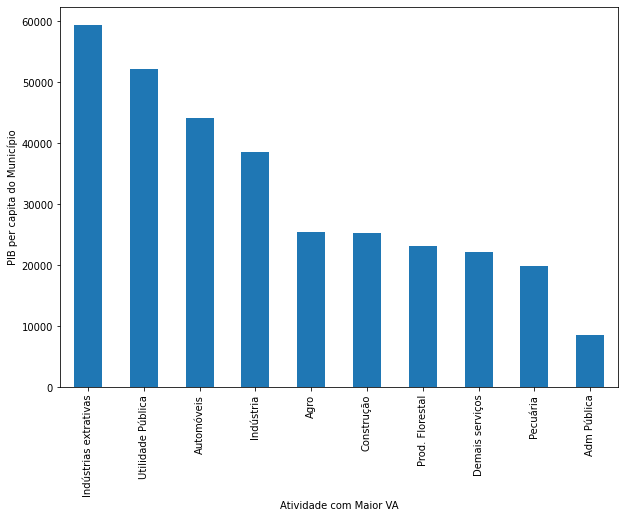

In [36]:
ax = df.groupby('ativ1')['PIB_per_capita'].mean().sort_values(ascending = False).plot.bar()
ax.set_xlabel('Atividade com Maior VA')
ax.set_ylabel('PIB per capita do Município')
plt.show()

### 5) Crie um dicionário com 'UF:Cidade com maior PIB per capita em 2017' para todas as UFs (excluindo DF).

In [12]:
dict_q5 = {}

for i in df.UF.unique():

  df_uf = df[(df.UF == i)&(df.Ano == 2017)].copy()
  max_pib_per_capita = df_uf.PIB_per_capita.max()
  nome_mun = df_uf[df_uf.PIB_per_capita == max_pib_per_capita].Nome.values[0]
  dict_q5[i] = nome_mun

In [13]:
dict_q5

{'AC': 'Epitaciolândia',
 'AL': 'Santana do Mundaú',
 'AM': 'Manaus',
 'AP': 'Ferreira Gomes',
 'BA': 'São Francisco do Conde',
 'CE': 'São Gonçalo do Amarante',
 'DF': 'Brasília',
 'ES': 'Presidente Kennedy',
 'GO': 'Davinópolis',
 'MA': 'Tasso Fragoso',
 'MG': 'São Gonçalo do Rio Abaixo',
 'MS': 'Selvíria',
 'MT': 'Campos de Júlio',
 'PA': 'Vitória do Xingu',
 'PB': 'Alhandra',
 'PE': 'Goiana',
 'PI': 'Baixa Grande do Ribeiro',
 'PR': 'Saudade do Iguaçu',
 'RJ': 'Porto Real',
 'RN': 'Guamaré',
 'RO': 'Pimenteiras do Oeste',
 'RR': 'Boa Vista',
 'RS': 'Triunfo',
 'SC': 'Piratuba',
 'SE': 'Canindé de São Francisco',
 'SP': 'Paulínia',
 'TO': 'Cariri do Tocantins'}

### 6) Qual (grande) região mais cresceu entre 2010 e 2017?

In [14]:
df_q6 = pd.DataFrame(df.groupby(['Ano','Grande Região'])['PIB'].sum()).reset_index()
df_q6 = df_q6[df_q6.Ano.isin([2010,2017])]

In [15]:
df_q6.set_index('Grande Região', inplace = True)

In [16]:
df_q6.groupby('Grande Região')['PIB'].pct_change().dropna()

Grande Região
Centro-oeste    0.859440
Nordeste        0.823392
Norte           0.776307
Sudeste         0.595959
Sul             0.808696
Name: PIB, dtype: float64

### 7) Quais os 10 municípios que mais perderam PIB no triênio 2014-2015-2016?

In [17]:
df_aux = df[df.Ano.isin([2013,2016])][['Ano','Nome','PIB','UF']].copy()

In [18]:
df_aux['Nome_uf'] = df_aux['Nome'] + '_' + df_aux['UF']

In [19]:
df_aux.set_index('Nome_uf', inplace = True)

In [20]:
s_q7 = df_aux.groupby(['Nome_uf'])['PIB'].pct_change().dropna()

In [21]:
s_q7.sort_values()[:10]

Nome_uf
Cairu_BA                -0.833563
Anchieta_ES             -0.825449
Quissamã_RJ             -0.794842
Reserva do Cabaçal_MT   -0.776156
Ilha Comprida_SP        -0.770627
Presidente Kennedy_ES   -0.758609
Marataízes_ES           -0.752031
Coari_AM                -0.743299
Casimiro de Abreu_RJ    -0.718520
Araçás_BA               -0.712247
Name: PIB, dtype: float64

### 8) Quais os 10 municípios do RJ que mais cresceram entre 2010-2017

In [22]:
df_q8 = df[(df.UF == 'RJ')&(df.Ano.isin([2010,2017]))].copy()

In [23]:
df_q8.set_index('Nome', inplace = True)

In [24]:
df_q8.groupby('Nome')['PIB'].pct_change().dropna().sort_values(ascending = False)[:10]

Nome
Maricá                 5.106359
Seropédica             4.008024
Itatiaia               1.917093
Cardoso Moreira        1.753848
Japeri                 1.331060
São Pedro da Aldeia    1.323124
São José de Ubá        1.265320
Varre-Sai              1.226160
Cordeiro               1.193747
Niterói                1.182359
Name: PIB, dtype: float64

### 9) Faça um heatmap com as UFs no eixo y e as taxas de crescimento dos anos 2011 até 2017 no eixo x.

Questão anulada, mas ficou valendo ponto extra com enunciado novo.


In [25]:
import seaborn as sns

In [26]:
df_q9 = df[['UF','Ano','PIB']].copy()

In [39]:
# Agrupando por UF e Ano os municípios, tirando a média e fazendo a variação percentual dessa média
df_q9_heat = pd.DataFrame(df.groupby(['UF','Ano'])['PIB'].mean()).pct_change().reset_index()
# Excluindo 2010 e pivotando o dataframe
df_q9_heat = df_q9_heat[df_q9_heat.Ano != 2010].pivot('UF','Ano','PIB')

In [40]:
df_q9_heat.head()

Ano,2011,2012,2013,2014,2015,2016,2017
UF,,,,,,,
AC,0.072771,0.132801,0.131783,0.172981,0.012193,0.009648,0.037576
AL,0.166744,0.094546,0.075963,0.099040,0.131598,0.066891,0.068219
AM,0.161921,0.021323,0.149614,0.043556,-0.001159,0.028551,0.046770
AP,0.142202,0.182974,0.146675,0.049892,0.034403,0.034690,0.079329
BA,0.078897,0.095855,0.121988,0.093172,0.094287,0.055889,0.038347


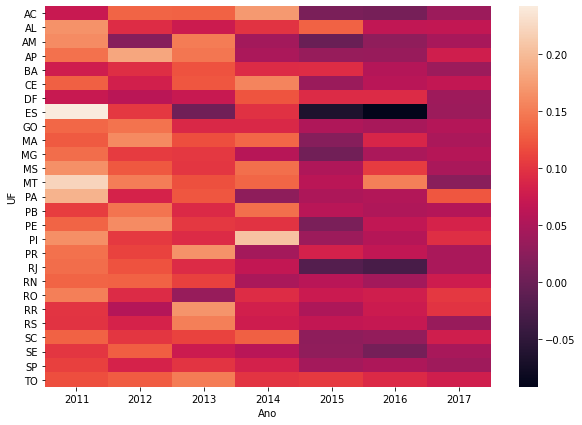

In [43]:
ax = sns.heatmap(df_q9_heat)

### 10) Crie uma função que receba a 'UF' (sigla) e plote um gráfico de linha do  PIB (eixo y) e os anos no eixo x.

In [55]:
def plota_UF(string_UF):

  ax, fig = plt.subplots()
  ax = df[df.UF == string_UF].groupby('Ano')['PIB'].mean().plot()
  ax.set_title(f'Série temporal do PIB de {string_UF}', fontsize = 18)
  ax.set_ylabel(f'PIB {string_UF}', fontsize = 14)
  ax.set_xlabel(f'Ano', fontsize = 14)
  plt.show()

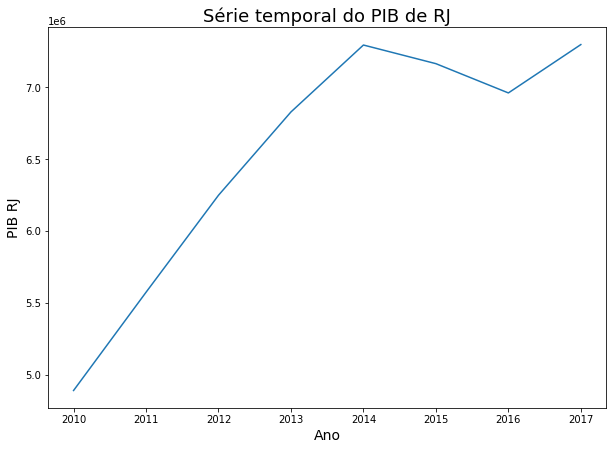

In [57]:
plota_UF('RJ')